## Libraries and variables

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score

data_path = "../01_Data/"
file_name_regr = "4-1_psp-data_feateng_featsel_regr.csv"
model_name = "4-3-1_psp-regr-model.pkl"
file_path_regr = data_path + file_name_regr

target_regr = "fee"

## Data load

In [71]:
df_regr = pd.read_csv(file_path_regr, index_col=0)
df_regr

,fee,PSP_UK_Card,PSP_Goldcard,PSP_Simplecard,PSP_Moneycard,success_max,card_Visa
0,2.0,0.0,0.0,0.0,1.0,0,0.0
1,0.5,0.0,0.0,1.0,0.0,0,0.0
2,0.5,0.0,0.0,1.0,0.0,0,0.0
3,2.0,1.0,0.0,0.0,0.0,0,0.0
4,1.0,0.0,0.0,1.0,0.0,1,0.0
...,...,...,...,...,...,...,...
38217,0.5,0.0,0.0,1.0,0.0,0,0.0
38218,5.0,0.0,0.0,0.0,1.0,1,0.0
38219,1.0,1.0,0.0,0.0,0.0,0,0.0
38220,0.5,0.0,0.0,1.0,0.0,0,0.0


## Split into train and test data

In [59]:
X = df_regr.drop(target_regr, axis=1)
y = df_regr[target_regr]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

## Regression

### Preparation

In [60]:
def grid_search_cv(estimator, params, scoring='r2', cv=5, jobs=-1, verbose=3, return_train_score=True ):
    gs_cv = GridSearchCV(estimator=estimator, param_grid=params, scoring=scoring, cv=cv, n_jobs=jobs, verbose=verbose, return_train_score=return_train_score)

    gs_cv.fit(X_train, y_train)

    print(f'Best Parameter: {gs_cv.best_params_}')
    print(f'Best Score: {gs_cv.best_score_}')

In [61]:
def print_metrics(y_pred, y_true = y_test):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"Mean Squared Error:", round(mse, 2))
    print(f"R^2 Score:", round(r2, 2))

In [62]:
def plot_residual(name:str, y_pred, y_true = y_test):
    residuals = y_true - y_pred

    plt.scatter(y_pred, residuals, color='blue', edgecolors='k', alpha=0.6)
    plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), color='red', linestyles='dashed')
    plt.xlabel('Predicted Value')
    plt.ylabel('Residues')
    plt.title(name + ' - Residual-Plot')
    plt.show()

In [63]:
def plot_comparison(name:str, y_pred, y_true = y_test):
    plt.scatter(y_true, y_pred, color='blue', edgecolors='k', alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', linestyle='--', linewidth=2)
    plt.xlabel('Actual Value')
    plt.ylabel('Predicted Value')
    plt.title(name + ' - Actual vs. Predicted Value of fee')
    plt.show()

### Linear Regression

In [30]:
# Find best Decistion Tree Classifier
param_grid_lr = {
    "fit_intercept": [True, False]
}

grid_search_cv(LinearRegression(), param_grid_lr)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Parameter: {'fit_intercept': True}
Best Score: 0.8178859582947691


Mean Squared Error: 0.82
R^2 Score: 0.81


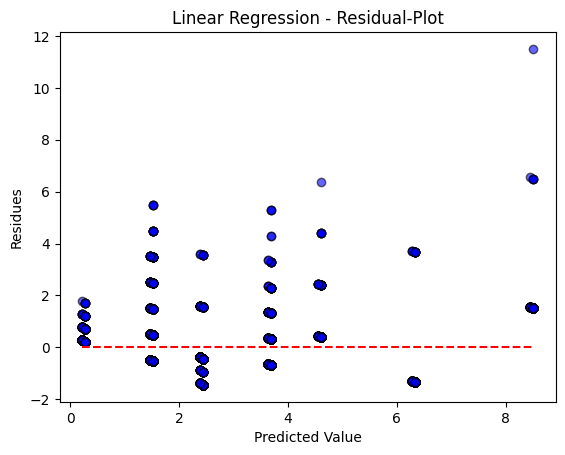

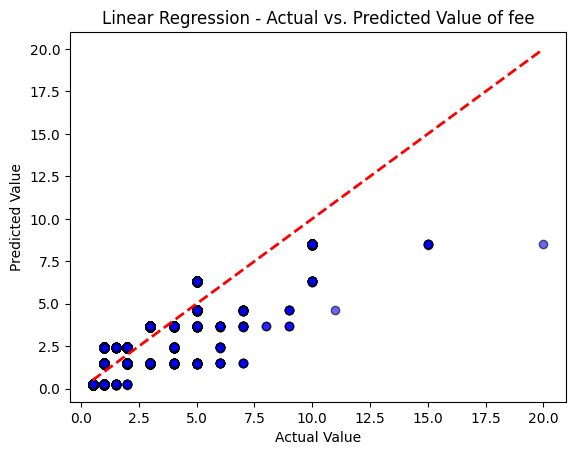

In [64]:
# Training with best model
reg_lre = LinearRegression(fit_intercept=True)
reg_lre.fit(X_train, y_train)

# Predictions
y_pred_lre = reg_lre.predict(X_test)

# Evalution
print_metrics(y_pred_lre)
plot_residual("Linear Regression", y_pred_lre)
plot_comparison("Linear Regression", y_pred_lre)

### SGD Regressor

In [32]:
# Find best SGD Regression
param_grid_sgd = {
    "penalty": ["l1", "l2", "elasticnet"],
    "alpha": [0.0001, 0.01, 1.0],
    "l1_ratio": [0.01, 0.15, 0.3],
    "max_iter": [500, 1000],
    "epsilon": [0.1, 0.2, 0.4],
    "learning_rate": ["constant", "optimal", "invscaling", "adaptive"],
    "random_state": [42]
}

grid_search_cv(SGDRegressor(), param_grid_sgd)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best Parameter: {'alpha': 0.0001, 'epsilon': 0.1, 'l1_ratio': 0.01, 'learning_rate': 'adaptive', 'max_iter': 500, 'penalty': 'l1', 'random_state': 42}
Best Score: 0.8178866101979849


Mean Squared Error: 0.82
R^2 Score: 0.81


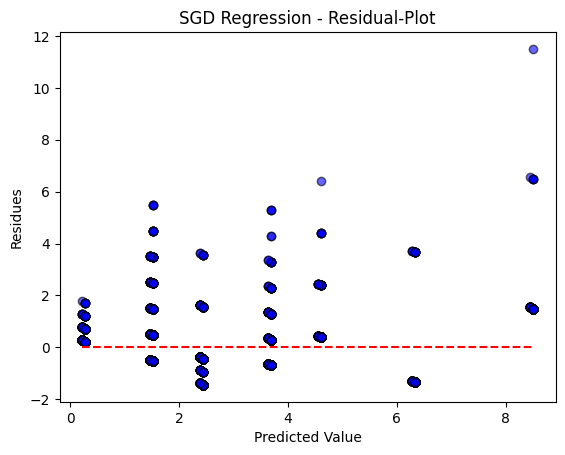

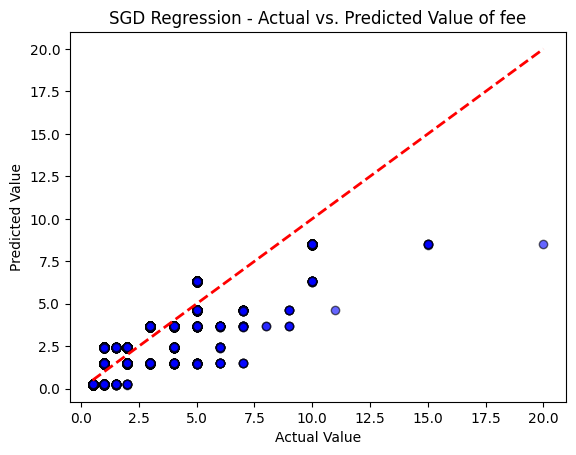

In [65]:
# Training with best model
reg_sgd = SGDRegressor(alpha=0.0001, epsilon=0.1, l1_ratio=0.01, learning_rate="adaptive", max_iter=500, penalty="l1", random_state=42)
reg_sgd.fit(X_train, y_train)

# Predictions
y_pred_sgd= reg_sgd.predict(X_test)

# Evalution
print_metrics(y_pred_sgd)
plot_residual("SGD Regression", y_pred_sgd)
plot_comparison("SGD Regression", y_pred_sgd)

### Lasso Regression

In [34]:
# Find best Lasso Regression
param_grid_lar = {
    "alpha": [0.5, 1.0, 2.0, 4.0],
    "fit_intercept": [True, False],
    "max_iter": [500, 1000, 2000], 
    "tol": [1e-4, 1e-5, 1e-6],
    "random_state": [42]
}

grid_search_cv(Lasso(), param_grid_lar)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameter: {'alpha': 0.5, 'fit_intercept': True, 'max_iter': 500, 'random_state': 42, 'tol': 0.0001}
Best Score: 0.01308672644349138


Mean Squared Error: 4.33
R^2 Score: 0.01


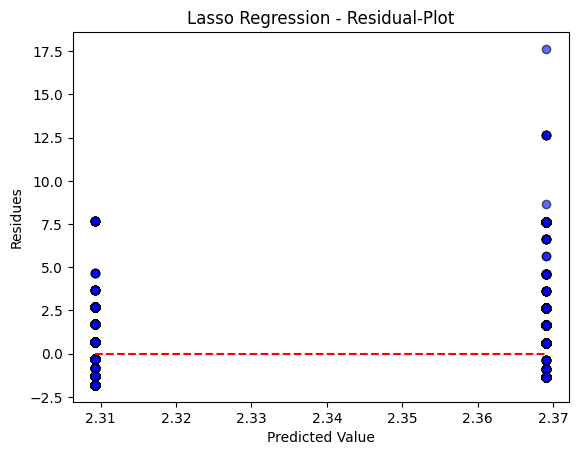

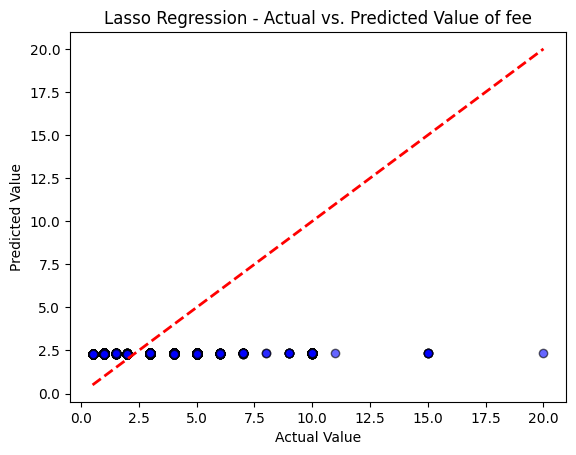

In [66]:
# Training with best model
reg_lar = Lasso(alpha=0.5, fit_intercept=True, max_iter=500, tol=0.0001, random_state=42)
reg_lar.fit(X_train, y_train)

# Predictions
y_pred_lar= reg_lar.predict(X_test)

# Evalution
print_metrics(y_pred_lar)
plot_residual("Lasso Regression", y_pred_lar)
plot_comparison("Lasso Regression", y_pred_lar)

### Ridge Regression

In [39]:
# Find best Lasso Regression
param_grid_rir = {
    "alpha": [0.5, 1.0, 2.0, 4.0],
    "fit_intercept": [True, False],
    "max_iter": [500, 1000, 2000], 
    "solver": ["svd", "cholesky", "sparse_cg", "lsqr", "sag"],
    "tol": [1e-4, 1e-5, 1e-6],
    "random_state": [42]
}

grid_search_cv(Ridge(), param_grid_rir)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best Parameter: {'alpha': 0.5, 'fit_intercept': True, 'max_iter': 500, 'random_state': 42, 'solver': 'cholesky', 'tol': 0.0001}
Best Score: 0.8178858939996168


Mean Squared Error: 0.82
R^2 Score: 0.81


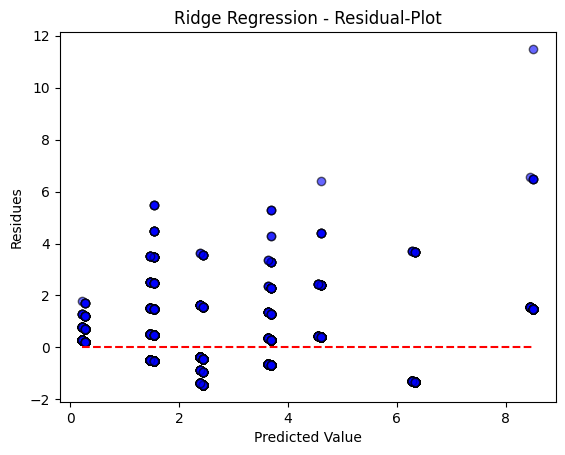

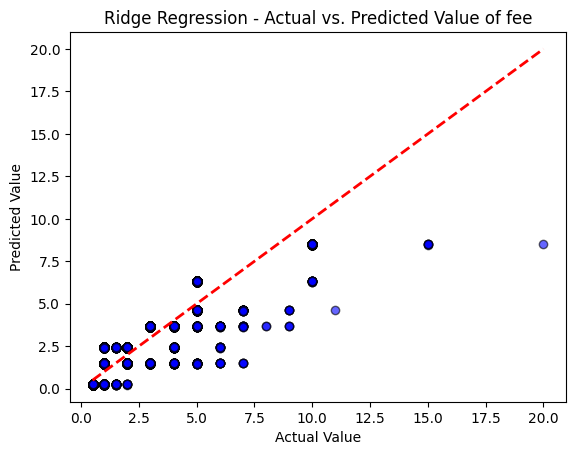

In [67]:
# Training with best model
reg_rir = Ridge(alpha=0.5, fit_intercept=True, max_iter=500, tol=0.0001, solver="cholesky", random_state=42)
reg_rir.fit(X_train, y_train)

# Predictions
y_pred_rir= reg_rir.predict(X_test)

# Evalution
print_metrics(y_pred_rir)
plot_residual("Ridge Regression", y_pred_rir)
plot_comparison("Ridge Regression", y_pred_rir)

### SVR

In [43]:
# Find best Lasso Regression
param_grid_svr = {
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "degree": [3, 4, 5],
    "tol": [1e-4, 1e-5, 1e-6],
    "C": [1.0, 2.0],
    "epsilon": [0.1, 0.2, 0.4]
}

grid_search_cv(SVR(), param_grid_svr)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameter: {'C': 1.0, 'degree': 4, 'epsilon': 0.4, 'kernel': 'poly', 'tol': 0.0001}
Best Score: 0.8741372590401072


Mean Squared Error: 0.58
R^2 Score: 0.87


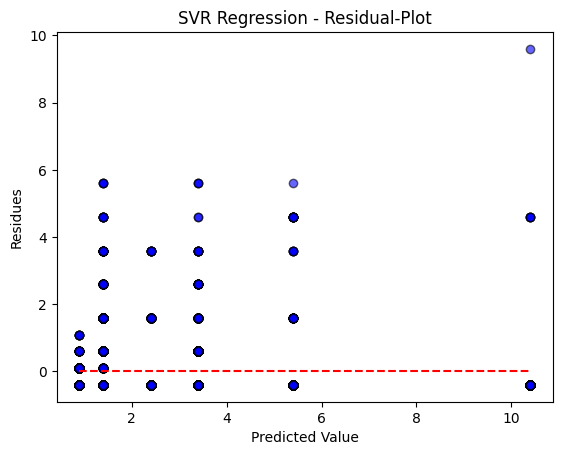

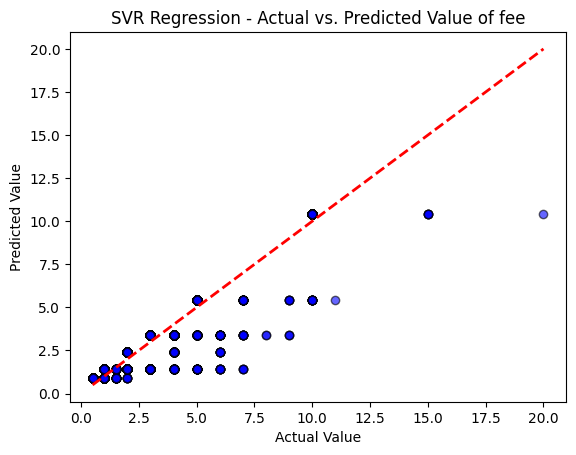

In [68]:
# Training with best model
reg_svr = SVR(C=1.0, degree=4, epsilon=0.4, kernel="poly", tol=0.0001)
#reg_svr = SVR()
reg_svr.fit(X_train, y_train)

# Predictions
y_pred_svr= reg_svr.predict(X_test)

# Evalution
print_metrics(y_pred_svr)
plot_residual("SVR Regression", y_pred_svr)
plot_comparison("SVR Regression", y_pred_svr)

In [69]:
# Save model
pickle.dump(reg_svr, open(data_path+model_name,'wb'))